In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
%%time

train = pd.read_csv('train.csv', parse_dates=['OrderedDate'])
test = pd.read_csv('test_additional.csv', parse_dates=['OrderedDate'])
validation = pd.read_csv('validation.csv', parse_dates=['OrderedDate'])
#test_additional = pd.read_csv('test_additional.csv', parse_dates=['OrderedDate'])

Wall time: 16.8 s


In [3]:
train.head()

,Id,main_id_locality,ETA,RTA,OrderedDate,latitude,del_latitude,longitude,del_longitude,EDA,...,ready_latitude,ready_longitude,onway_latitude,onway_longitude,arrived_latitude,arrived_longitude,center_latitude,center_longitude,route,track
0,0,1078,226.0,188.0,2020-02-12 19:12:06,55.826019,55.825581,49.134529,49.126949,1.0,...,55.825647,49.134115,55.826261,49.134137,55.825707,49.127136,55.794388,49.111531,gnvsIaq{jHChA??uC???OPG^F^NRzKBd@AN[r@???`@`@`...,io{jHkivsID_A??A}@i@m@I]^SFKBK@AD@@????A?@??A@...
1,1,1078,718.0,725.0,2020-02-12 19:12:22,55.795502,55.820911,49.131470,49.115360,5.0,...,55.795591,49.132281,55.795544,49.131552,55.821531,49.115685,55.794388,49.111531,sqpsI}~zjHyAr]e@lMk@fLaBlb@i@rLKhBCdAUxEGlCg@f...,qh{jHappsIAAA?\EVSLAC@r@I????h@ERAL?R?x@Cf@ARD...
2,2,1078,612.0,764.0,2020-02-12 19:12:44,55.791050,55.819962,49.226070,49.176628,5.0,...,55.791099,49.226066,55.791099,49.226066,55.819765,49.177432,55.794388,49.111531,auosI}mmkH?LHd@KhC??o@w@[g@m@iAUk@??{G|OiB`Ek@...,}mmkHkuosI????????????????????????????????K?O@...
3,3,1078,1560.0,1412.0,2020-02-12 19:12:44,55.753899,55.824680,49.188519,49.093700,13.0,...,55.754116,49.188853,55.754116,49.188853,55.824734,49.094013,55.794388,49.111531,{lhsIiffkHmKN_C?mIPwMJ??Si@gA{B??Wq@MRCJTp@hAd...,gefkH{{hsIQr@Gn@GlAAr@Ct@@^@J@ZFf@FVHHDD??????...
4,4,1078,1528.0,893.0,2020-02-12 19:12:45,55.822361,55.786758,49.069092,49.143501,9.0,...,55.822483,49.069659,55.822617,49.069229,55.786936,49.143330,55.794388,49.111531,yxusI{xnjHgAfG??}IuHkAqA??pIoe@VsA??dAkG`BuH??...,synjHkzusIHAA?E@C?????????????????????????DARE...


In [4]:
train.describe()

,Id,main_id_locality,ETA,RTA,latitude,del_latitude,longitude,del_longitude,EDA,RDA,ready_latitude,ready_longitude,onway_latitude,onway_longitude,arrived_latitude,arrived_longitude,center_latitude,center_longitude
count,837128.000000,837128.000000,837128.000000,837128.000000,837128.000000,837128.000000,837128.000000,837128.000000,837128.000000,837128.000000,834220.000000,834220.000000,834220.000000,834220.000000,834220.000000,834220.000000,837128.000000,837128.000000
mean,415673.308725,14423.438796,923.829395,761.606140,55.069583,55.069632,50.585098,50.584573,5.879929,5.288495,55.069648,50.584642,55.069654,50.584643,55.069699,50.584123,55.062456,50.545537
std,239748.838834,10329.793536,551.592757,455.810121,2.249661,2.249805,3.454010,3.454653,4.562669,3.711791,2.249315,3.453416,2.249313,3.453411,2.249454,3.454041,2.261140,3.475663
min,0.000000,1078.000000,66.000000,64.000000,51.337749,51.031120,45.607342,45.598839,1.000000,1.000000,51.340227,45.600154,51.340430,45.597737,51.031205,45.599122,51.530376,45.953026
25%,208187.750000,1078.000000,524.000000,439.000000,53.206921,53.206951,49.107552,49.107830,3.000000,3.000000,53.206694,49.107750,53.206734,49.107624,53.206887,49.107858,53.183330,49.111531
50%,415507.500000,22390.000000,795.000000,653.000000,55.779968,55.781502,49.220520,49.221771,5.000000,4.000000,55.779948,49.220296,55.779974,49.220325,55.781549,49.221621,55.794388,49.111531
75%,623083.250000,22430.000000,1195.000000,964.000000,55.865045,55.866859,50.280788,50.284241,7.000000,7.000000,55.864933,50.280397,55.864926,50.280417,55.866720,50.283834,55.794388,50.116670
max,831223.000000,22438.000000,9613.000000,8370.000000,58.300060,58.334469,56.776402,56.960960,153.000000,200.000000,58.297838,56.776622,58.297935,56.776591,58.334796,56.961268,58.010321,56.234178


In [8]:
columns = ['Id','main_id_locality','ETA','OrderedDate','latitude','del_latitude','longitude','del_longitude','EDA','center_latitude','center_longitude']

In [6]:
%%time

#выполняем предварительную кластеризацию
from sklearn.cluster import KMeans

#задаем модель
qty_clust = 300
#model_clust = KMeans(n_clusters=qty_clust, algorithm="full")
model_clust = KMeans(n_clusters=qty_clust, algorithm="elkan")
anal_col = ['latitude','longitude']
train_data = np.array(train[anal_col])
model_clust.fit(train_data)

Wall time: 7min 24s


KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=300, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
%%time

def feats(df):
    df = df[columns].copy()
    df['dayofweek'] = df['OrderedDate'].dt.dayofweek
    df['hour'] = df['OrderedDate'].dt.hour#+df['minute']
    
    clust_data = np.array(df[anal_col])
    df['clust'] = model_clust.predict(clust_data)
    clust_data = np.array(df[['del_latitude','del_longitude']])
    df['del_clust'] = model_clust.predict(clust_data)
    
    df['new_clust'] = df['clust']*300+df['del_clust']

    del df['OrderedDate']
    del df['latitude']
    del df['del_latitude']
    del df['longitude']
    del df['del_longitude']
    del df['center_latitude']
    del df['center_longitude']
    
    return df

feats(validation[:1000]).head()

Wall time: 40.9 ms


,Id,main_id_locality,ETA,EDA,dayofweek,hour,clust,del_clust,new_clust
0,0,1078,1809,12,3,10,76,71,22871
1,1,1078,1320,14,3,10,66,280,20080
2,2,1078,650,4,3,10,243,255,73155
3,3,1078,793,5,3,10,48,23,14423
4,4,1078,498,2,3,10,39,291,11991


In [11]:
%%time

X_tr = feats(train)
X_va = feats(validation)
X_te = feats(test)

y_tr = train.RTA
y_va = validation.RTA

Wall time: 8.02 s


In [12]:
cat_cols = ['main_id_locality','dayofweek','hour','clust','del_clust','new_clust']

In [13]:
X_tr = X_tr.append(X_va)
y_tr = y_tr.append(y_va)

In [14]:
import lightgbm as lgb
import gc

tr_data = lgb.Dataset(X_tr, label=y_tr, categorical_feature=cat_cols)
va_data = lgb.Dataset(X_va, label=y_va, categorical_feature=cat_cols, reference=tr_data)

gc.collect()

# Train the model
parameters = {
    'task': 'train',
    'boosting_type': 'dart',
    'objective': 'regression',
    'metric': 'mean_absolute_percentage_error',
    'num_leaves':200
}


model = lgb.train(parameters,
                  tr_data,
                  valid_sets=va_data,
                  num_boost_round=170,
                  early_stopping_rounds=100,
                  verbose_eval=5)

C:\Anaconda3\lib\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[5]	valid_0's mape: 0.385208
[10]	valid_0's mape: 0.298288
[15]	valid_0's mape: 0.242481
[20]	valid_0's mape: 0.198163
[25]	valid_0's mape: 0.181918
[30]	valid_0's mape: 0.171961
[35]	valid_0's mape: 0.169196
[40]	valid_0's mape: 0.168455
[45]	valid_0's mape: 0.166767
[50]	valid_0's mape: 0.141352
[55]	valid_0's mape: 0.140964
[60]	valid_0's mape: 0.155728
[65]	valid_0's mape: 0.188067
[70]	valid_0's mape: 0.15206
[75]	valid_0's mape: 0.139292
[80]	valid_0's mape: 0.137818
[85]	valid_0's mape: 0.139772
[90]	valid_0's mape: 0.141415
[95]	valid_0's mape: 0.148273
[100]	valid_0's mape: 0.139039
[105]	valid_0's mape: 0.1655
[110]	valid_0's mape: 0.159389
[115]	valid_0's mape: 0.137619
[120]	valid_0's mape: 0.137029
[125]	valid_0's mape: 0.137475
[130]	valid_0's mape: 0.137636
[135]	valid_0's mape: 0.135463
[140]	valid_0's mape: 0.13831
[145]	valid_0's mape: 0.136325
[150]	valid_0's mape: 0.135865
[155]	valid_0's mape: 0.138994
[160]	valid_0's mape: 0.144764
[165]	valid_0's mape: 0.135561
[

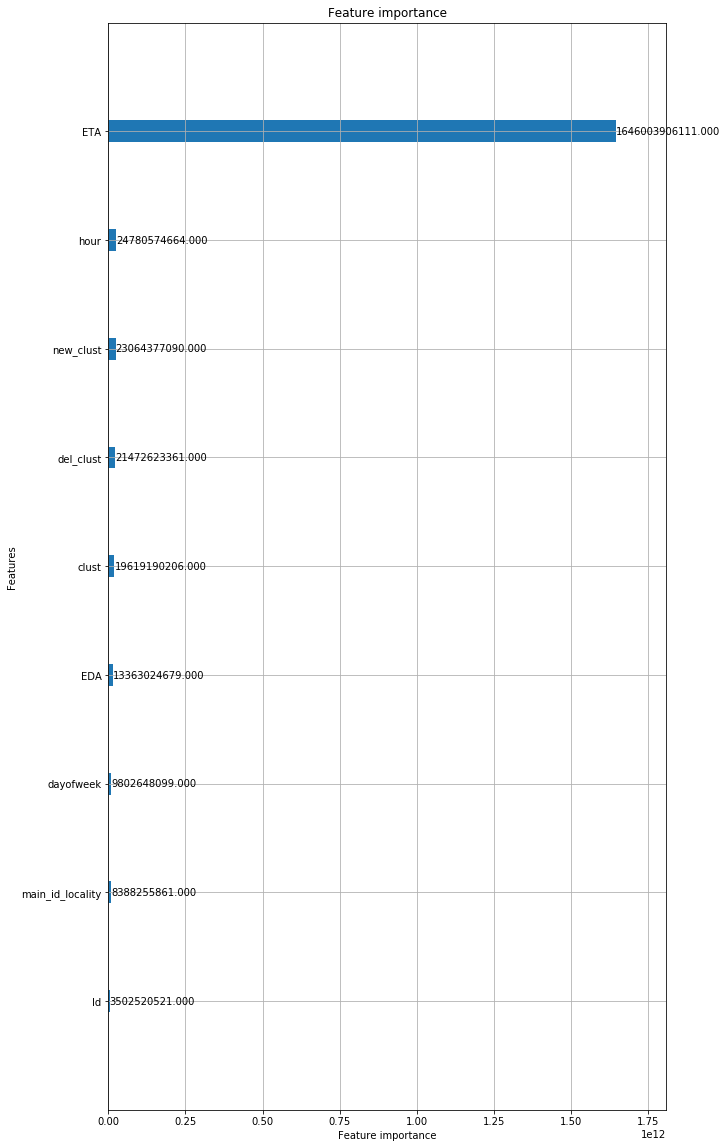

In [15]:
%matplotlib inline
lgb.plot_importance(model, importance_type='gain', figsize=(10,20));

In [16]:
y_te = model.predict(X_te)
y_te

array([ 889.27740194,  664.0747215 ,  357.48163664, ..., 1235.6294984 ,
        278.95001494, 1455.70520991])

In [17]:
X_te['Id'] = X_te.index
X_te['Prediction'] = model.predict(X_te)

In [18]:
X_te[['Id','Prediction']].to_csv('submit.csv', index=False)